In [ ]:
import pandas as pd

kaggle_file = pd.read_csv("/content/drive/MyDrive/bestsellers with categories.csv")

In [ ]:
# dispaly 5 firsts rows

kaggle_file.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [ ]:
# print(kaggle_file.count()) #- check how many rows file has

print(f'File has {kaggle_file.size} rows  - which means that file has {len(kaggle_file.columns)} columns and there are 550 rows in each column')


File has 3850 rows  - which means that file has 7 columns and there are 550 rows in each column


In [ ]:
print('How many books are data stored in the dataset?  ANSWER: 351 books')

print('________________________________')
print(kaggle_file.nunique(axis = 0,dropna=True))



How many books are data stored in the dataset?  ANSWER: 351 books
________________________________
Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64


In [ ]:
# changing columns names for all lower letters and replace space for "_"

kaggle_file.rename(str.lower, axis = 'columns', inplace=True)
kaggle_file.rename(columns={kaggle_file.columns[2]:"user_rating"},inplace=True)

kaggle_file.columns

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

In [ ]:
# Check if all columns hava no empty rows. 0 confirm that in this column is 0 empty rows.

print('Are there any variables with missing values? ANSWER: No')
print('________________________________________________________')

kaggle_file.isnull().sum()

Are there any variables with missing values? ANSWER: No
________________________________________________________


,0
name,0
author,0
user_rating,0
reviews,0
price,0
year,0
genre,0


In [ ]:
print('There are only 2 unique rows in "genre" column')
print('______________________________________________')
kaggle_file.nunique(axis = 0)

There are only 2 unique rows in "genre" column
______________________________________________


,0
name,351
author,248
user_rating,14
reviews,346
price,40
year,11
genre,2


In [ ]:
print('What are the unique species? ASNWER: "Fiction" and "Non Fiction"')
print('__________________________________________________________________')

n = kaggle_file.groupby("genre")
n['name'].apply(lambda x: x)


What are the unique species? ASNWER: "Fiction" and "Non Fiction"
__________________________________________________________________


genre           
Fiction      1                                      11/22/63: A Novel
             3                                 1984 (Signet Classics)
             5          A Dance with Dragons (A Song of Ice and Fire)
             6      A Game of Thrones / A Clash of Kings / A Storm...
             7                         A Gentleman in Moscow: A Novel
                                          ...                        
Non Fiction  539    Women Food and God: An Unexpected Path to Almo...
             546    You Are a Badass: How to Stop Doubting Your Gr...
             547    You Are a Badass: How to Stop Doubting Your Gr...
             548    You Are a Badass: How to Stop Doubting Your Gr...
             549    You Are a Badass: How to Stop Doubting Your Gr...
Name: name, Length: 550, dtype: object

In [ ]:
# Chart

In [ ]:
kaggle_file['price'].max()
kaggle_file['price'].min()
kaggle_file['price'].mean()
kaggle_file['price'].median()

In [ ]:
print(f"Maximum price for a book ? ANSWER: {kaggle_file['price'].max()}")
print(f"Minimum price for a book ? ANSWER :{kaggle_file['price'].min()}")
print(f"Average price per book   ? ANSWER: {kaggle_file['price'].mean()}")
print(f"Median price per book    ? ANSWER:{kaggle_file['price'].median()}")

Maximum price for a book ? ANSWER: 105
Minimum price for a book ? ANSWER :0
Average price per book   ? ANSWER: 13.1
Median price per book    ? ANSWER:11.0


In [ ]:
print(f"What is the highest rating in the dataset? ANSWER: {kaggle_file['user_rating'].max()}")

What is the highest rating in the dataset? ANSWER: 4.9


In [ ]:
print(f"How many books have this rating? ANSWER:{kaggle_file.agg({'user_rating': 'max'}).count()}")

How many books have this rating? ANSWER:1


In [ ]:
sort_reviews = (kaggle_file[['name','reviews']].sort_values('reviews')).tail(1)
print(sort_reviews)

print("________________________________________________________________")
print(f"Which book has the most reviews? ANSWER: Book {sort_reviews['name'].max()} has {kaggle_file['reviews'].max()} reviews")


                        name  reviews
534  Where the Crawdads Sing    87841
________________________________________________________________
Which book has the most reviews? ANSWER: Book Where the Crawdads Sing has 87841 reviews


In [ ]:

top_50 = kaggle_file.sort_values(by = 'user_rating').tail(50)
year_2015 = top_50.where(top_50['year']== 2015)
price = year_2015[['name','price','year']].sort_values('price').dropna()

print(price)

print(f"Which of the Top 50 books in 2015 is the most expensive? ANSWER: Humans of New York : Stories costs {price['price'].max()}" )
print('_____________________________________________________________________________________________________________________________')


                                                  name  price    year
478                        The Very Hungry Caterpillar    5.0  2015.0
191  Jesus Calling: Enjoying Peace in His Presence ...    8.0  2015.0
248                          Oh, the Places You'll Go!    8.0  2015.0
174                       Humans of New York : Stories   17.0  2015.0
Which of the Top 50 books in 2015 is the most expensive? ANSWER: Humans of New York : Stories costs 17.0
_____________________________________________________________________________________________________________________________


In [ ]:
year_2010 = kaggle_file.where(kaggle_file['year'] == 2010).dropna()
top_50_2010 =year_2010.sort_values('user_rating').tail(50)

result = top_50_2010[['name','genre','year','user_rating']].where(top_50_2010['genre']== 'Fiction').dropna()

print(f"How many Fiction books were in the Top 50 in 2010? ANSWER: {result['name'].count()}")

How many Fiction books were in the Top 50 in 2010? ANSWER: 20


In [ ]:
year_2011 = kaggle_file.where(kaggle_file['year'] == 2011)

year_2011['user_rating'].where(year_2011['user_rating'] == 4.9).dropna().count()

print(f"How many books with a rating of 4.9 were included in the ranking in 2010 and 2011?")
print('ANSWER:')
print(f" In 2010 is only {year_2011['user_rating'].where(year_2011['user_rating'] == 4.9).dropna().count()} book with 4,9.")
print(f" In 2010 is only {year_2010['user_rating'].where(year_2010['user_rating'] == 4.9).dropna().count()} books with 4,9.")


How many books with a rating of 4.9 were included in the ranking in 2010 and 2011?
ANSWER:
 In 2010 is only 1 book with 4,9.
 In 2010 is only 0 books with 4,9.


In [ ]:
result = kaggle_file.where(kaggle_file['price']< 8)

r = result[['name','year','price']].where(result['year']== 2015).dropna()

print(f"Sorted by price in ascending order, all books that were listed in 2015 and cost less than $8.")
print('________________________________________________________________________________________________')

r.sort_values(by='price',ascending=True)


Sorted by price in ascending order, all books that were listed in 2015 and cost less than $8.
________________________________________________________________________________________________


,name,year,price
507,To Kill a Mockingbird,2015.0,0.0
210,Laugh-Out-Loud Jokes for Kids,2015.0,4.0
206,Knock-Knock Jokes for Kids,2015.0,4.0
111,First 100 Words,2015.0,4.0
123,Giraffes Can't Dance,2015.0,4.0
54,Creative Haven Creative Cats Coloring Book (Ad...,2015.0,4.0
63,Dear Zoo: A Lift-the-Flap Book,2015.0,5.0
89,Dover Creative Haven Art Nouveau Animal Design...,2015.0,5.0
478,The Very Hungry Caterpillar,2015.0,5.0
201,Killing Reagan: The Violent Assault That Chang...,2015.0,5.0


In [ ]:
print(f"Which book is last in the sorted list?")
print(f"ANSWER: Book: '{kaggle_file['name'].iloc[253]}' ")

Which book is last in the sorted list?
ANSWER: Book: 'Old School (Diary of a Wimpy Kid #10)' 


In [ ]:
print(f"Max price per book genre:")
print("Maximum price for the Fiction genre: ANSWER : 82")
print("Maximum price for the Non Fiction genre: ANSWER : 105")

print(kaggle_file.groupby('genre').agg({'price': max}))

Max price per book genre:
Maximum price for the Fiction genre: ANSWER : 82
Maximum price for the Non Fiction genre: ANSWER : 105
             price
genre             
Fiction         82
Non Fiction    105


<ipython-input-24-72d691b7aaa1>:5: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  print(kaggle_file.groupby('genre').agg({'price': max}))


In [ ]:
print(f'Min price per book genre:')
print("Minimum price for the Fiction genre: ANSWER: 0")
print("Minimum price for the Non Fiction genre: ANSWER: 0")
p =kaggle_file.dropna()

print(p.groupby('genre').agg({'price': min}))

Min price per book genre:
Minimum price for the Fiction genre: ANSWER: 0
Minimum price for the Non Fiction genre: ANSWER: 0
             price
genre             
Fiction          0
Non Fiction      0


<ipython-input-26-8c33f43bbf84>:6: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print(p.groupby('genre').agg({'price': min}))


In [ ]:
from collections import Counter
kaggle_file.groupby("author").agg({'author': 'count'})
print(f"What is the dimension of the table? ANSWER: {(kaggle_file.groupby('author').agg({'author': 'count'})).size} rows and 1 column")
kaggle_file.groupby('author').agg({'author': 'count'})


What is the dimension of the table? ANSWER: 248 rows and 1 column


,author
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


In [ ]:
print(f"Which author has the most books? ANSWER: Jeff Kinney")
print(f"How many books are there by this author? ANSWER:12")
print((kaggle_file.groupby('author').agg({'author': 'count'})).max())
(kaggle_file.groupby('author').agg({'author': 'count'}))['author'].where(kaggle_file.groupby('author').agg({'author': 'count'})['author'] == 12).dropna()


Which author has the most books? ANSWER: Jeff Kinney
How many books are there by this author? ANSWER:12
author    12
dtype: int64


,author
author,
Jeff Kinney,12.0


In [ ]:
print(f"Which author has the lowest average rating? ANSWER: Donna Tartt")
print("What is the average rating for this author? ANSWER: 3.9")

((kaggle_file.groupby('author').agg({'user_rating': 'mean'})).round(1).sort_values('user_rating')).head(1)

Which author has the lowest average rating? ANSWER: Donna Tartt
What is the average rating for this author? ANSWER: 3.9


,user_rating
author,
Donna Tartt,3.9


In [ ]:
author_books =(kaggle_file.groupby('author').agg({'author': 'count'})).sort_index(axis=1,ascending=True)
author_rating = ((kaggle_file.groupby('author').agg({'user_rating': 'mean'})).round(1).sort_values('user_rating')).sort_values('author')
author_books_1 = author_books.rename(columns = {"author": "book_quantity"})

new_df = pd.concat([author_books_1,author_rating], axis=1)
print("________________________________________________________________________")
print(f"Creating a new df by conection two dataframes by author - 'concat' method'")
print("________________________________________________________________________")
print(f"{new_df}")

merged_df = author_books_1.merge(author_rating, on='author')
print("________________________________________________________________________")
print(f"Creating a new df by conection two dataframes by author - 'merge' method")
print("________________________________________________________________________")
print(f"{merged_df}")

________________________________________________________________________
Creating a new df by conection two dataframes by author - 'concat' method'
________________________________________________________________________
                            book_quantity  user_rating
author                                                
Abraham Verghese                        2          4.6
Adam Gasiewski                          1          4.4
Adam Mansbach                           1          4.8
Adir Levy                               1          4.8
Admiral William H. McRaven              1          4.7
...                                   ...          ...
Walter Isaacson                         3          4.6
William Davis                           2          4.4
William P. Young                        2          4.6
Wizards RPG Team                        3          4.8
Zhi Gang Sha                            2          4.6

[248 rows x 2 columns]
________________________________________

In [ ]:
print("______________________________________________________________")
print("Sorting  first by the 'book_quantity and then 'user_rating' ")
print("______________________________________________________________")
print(merged_df.sort_values(by=['book_quantity', 'user_rating'], ascending=[True, True]))

print("___________________________________________________________")
print(f"Which author is first on the list? ANSWER: Muriel Barbery ")
print("___________________________________________________________")
print(f"{(merged_df.sort_values(by=['book_quantity', 'user_rating'], ascending=[True, True])).head(1)}")


______________________________________________________________
Sorting  first by the 'book_quantity and then 'user_rating' 
______________________________________________________________
                                    book_quantity  user_rating
author                                                        
Muriel Barbery                                  1          4.0
Chris Cleave                                    1          4.1
Ian K. Smith M.D.                               1          4.1
Pierre Dukan                                    1          4.1
Elizabeth Strout                                1          4.2
...                                           ...          ...
American Psychological Association             10          4.5
Gary Chapman                                   11          4.7
Suzanne Collins                                11          4.7
Rick Riordan                                   11          4.8
Jeff Kinney                                    12        

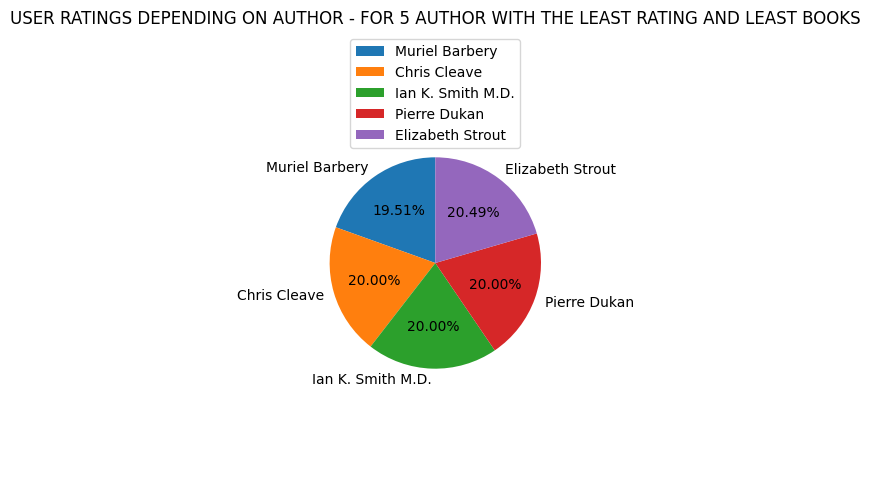

In [ ]:
from logging import Handler
import matplotlib_inline
import matplotlib.pyplot as plt

authors = ['Muriel Barbery', 'Chris Cleave', 'Ian K. Smith M.D.','Pierre Dukan', 'Elizabeth Strout']
user_rating=[4.0, 4.1, 4.1, 4.1, 4.2]

# Circle chart
plt.figure(figsize=(3, 6))
plt.pie(user_rating, labels=authors, autopct="%.2f%%", startangle=90)
plt.title('USER RATINGS DEPENDING ON AUTHOR - FOR 5 AUTHOR WITH THE LEAST RATING AND LEAST BOOKS')
plt.legend( loc = 'upper center')
plt.axis('equal')
plt.show()

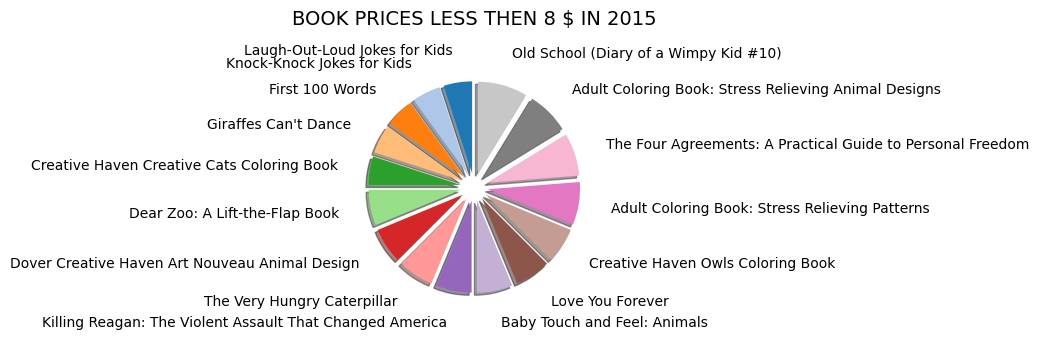

In [11]:
import pandas as pd
import matplotlib_inline
import matplotlib.pyplot as plt

# Data:

data = {
    'name': [
        'Laugh-Out-Loud Jokes for Kids', 'Knock-Knock Jokes for Kids',
        'First 100 Words', 'Giraffes Can\'t Dance', 'Creative Haven Creative Cats Coloring Book',
        'Dear Zoo: A Lift-the-Flap Book', 'Dover Creative Haven Art Nouveau Animal Design',
        'The Very Hungry Caterpillar', 'Killing Reagan: The Violent Assault That Changed America',
        'Baby Touch and Feel: Animals', 'Love You Forever', 'Creative Haven Owls Coloring Book',
        'Adult Coloring Book: Stress Relieving Patterns', 'The Four Agreements: A Practical Guide to Personal Freedom',
        'Adult Coloring Book: Stress Relieving Animal Designs', 'Old School (Diary of a Wimpy Kid #10)'
    ],
    'price': [
        4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 7.0
    ],
    'explode':[
        0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15
    ]
}

df = pd.DataFrame(data)

# Creating circle chart:

plt.figure(figsize=(3, 4))
plt.pie(df['price'], labels=df['name'], shadow = True, explode = df['explode'], startangle=90,pctdistance=1.15,labeldistance=1.35, colors=plt.cm.tab20.colors)
plt.title('BOOK PRICES LESS THEN 8 $ IN 2015', fontsize = 14)
plt.axis('equal')
plt.show()

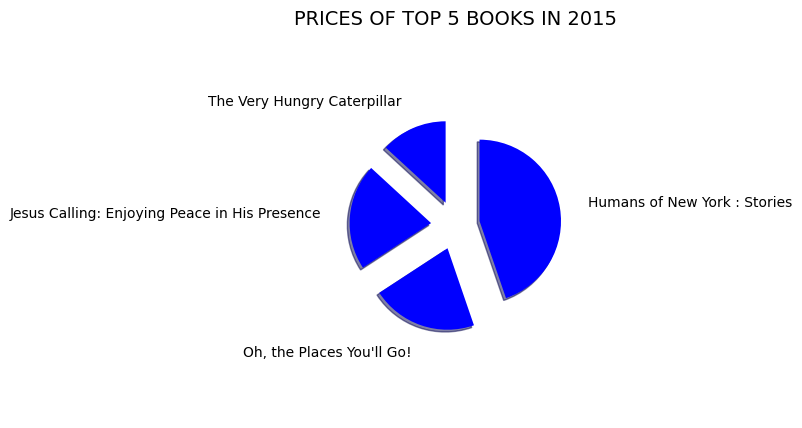

In [45]:
import pandas as pd
import matplotlib.pyplot as plt



# Data:

data = {
    'name': [
        'The Very Hungry Caterpillar',
        'Jesus Calling: Enjoying Peace in His Presence',
        "Oh, the Places You'll Go!",
        'Humans of New York : Stories'
    ],
    'price': [5.0, 8.0, 8.0, 17.0
    ],
    'explode': [0.3, 0.3, 0.3, 0.3
    ],
}

df = pd.DataFrame(data)

# Circle chart
plt.figure(figsize=(3, 5))
plt.pie(df['price'], labels=df['name'],  shadow = True, explode = df['explode'], startangle=90, colors='b', pctdistance=1.15,labeldistance=1.35)
plt.title('PRICES OF TOP 5 BOOKS IN 2015', fontsize=14)
plt.axis('equal')
plt.show()